<a href="https://colab.research.google.com/github/denpetrov/.vimrc/blob/master/w04_NLP_Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers  # Figure out how to import regularizers
###

import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-08-18 19:39:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.128, 2607:f8b0:4001:c18::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-08-18 19:39:36 (118 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))  # Your Embedding Layer
model.add(Bidirectional(LSTM(150, return_sequences=True)))  # An LSTM Layer
model.add(Dropout(0.20))  # A dropout layer
model.add(LSTM(100))  # Another LSTM Layer
model.add(Dense(total_words / 2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax'))  # A Dense Layer

adam = Adam()  # Pick an optimizer

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])  # Pick a loss function and an optimizer
print(model.summary())


W0818 19:39:37.488738 140445818574720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0818 19:39:37.515336 140445818574720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0818 19:39:37.524085 140445818574720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [4]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

W0818 19:39:38.539006 140445818574720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
15462/15462 [==============================] - 28s 2ms/sample - loss: 6.8949 - acc: 0.0216
Epoch 2/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.5003 - acc: 0.0235
Epoch 3/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.3916 - acc: 0.0255
Epoch 4/100
15462/15462 [==============================] - 26s 2ms/sample - loss: 6.2673 - acc: 0.0289
Epoch 5/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.1718 - acc: 0.0358
Epoch 6/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 6.0819 - acc: 0.0379
Epoch 7/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 5.9960 - acc: 0.0411
Epoch 8/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 5.9154 - acc: 0.0440
Epoch 9/100
15462/15462 [==============================] - 25s 2ms/sample - loss: 5.8163 - acc: 0.0508
Epoch 10/100
15462/15462 [==============================] - 25s 2ms/sampl

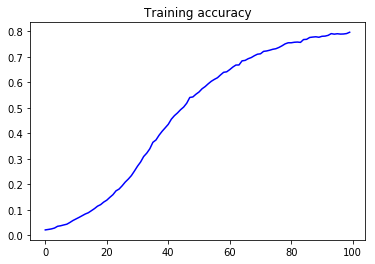

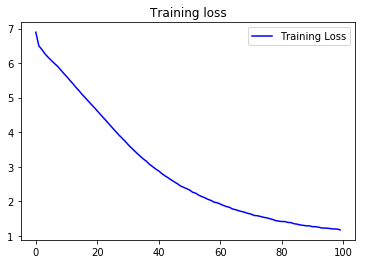

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [6]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope must each me can expire remain prove day 'tis slain be spent taken back within more rare must be take you best ' still better bright i know your grief lies shine shine go lies bring die days did ride shine ever be done taste still 'no is buried age and thine brows are wink as they glance men forgot thee by find muse keep they latch taken grow leaves common place time ' so best know know not so done say it not you to call my friend must in thee one part new ' so free still free
